**Importing Necessary Libraries**

In [1]:
# Importing necessary libraries
import numpy as np  # Used for array operations
import scipy.io  # To load .mat files (EEG data)
import tensorflow as tf  # For deep learning tasks
from google.colab import drive  # For accessing Google Drive
import os  # Used to handle file system operations
import pandas as pd
from pprint import pprint

**Manage GPU memory**

In [2]:
# Manage GPU memory usage to prevent out of memory (OOM) errors
# This makes TensorFlow allocate memory dynamically as needed
try:
  physical_devices = tf.config.list_physical_devices('GPU')
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print(f"GPU is available: {physical_devices}")
except:
  print("No GPU Found or TensorFlow Unable To Allocate Memory Dynamically.")

No GPU Found or TensorFlow Unable To Allocate Memory Dynamically.


**Mounting Google Drive to access data**

In [3]:
# Mounting Google Drive to access data
drive.mount('/content/drive/',force_remount=True)  # Mounting Google Drive where your data is stored

Mounted at /content/drive/


**Processing Files**

In [4]:
# Here you would load and process the single file, for example:

#Define the Data Directory
data_dir = '/content/drive/MyDrive/colab_notebook/motor_img_class/data/BCICIV_1_mat/'

#verify the the directory exists before processing
if not os.path.exists(data_dir):
  raise ValueError(f"Data Directory {data_dir} not found. Check the path.")

#Define the specific file you to process
filename = 'BCICIV_calib_ds1d.mat'  # Modify this if you want to process a different file
path_file = os.path.join(data_dir,filename)

#check if the sepfic file exisits before proceeding
if not os.path.exists(path_file):
  raise FileNotFoundError(f"File {filename} not found in {data_dir}")

print(f"Processing file: {filename}")

Processing file: BCICIV_calib_ds1d.mat


In [5]:
# Load the .mat file containing the EEG data
# The 'struct_as_record=True' option ensures that MATLAB structs are treated as Python objects
m = scipy.io.loadmat(path_file, struct_as_record=True)

In [6]:
#Display the top-level keys in the loaded data to see the structure
print("Top Level Keys in the loaded .mat file:")
pprint(m.keys())


#To inspect the data types of each key
for key in m.keys():
  print(f"Type of {key}: {type(m[key])}")

Top Level Keys in the loaded .mat file:
dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'cnt', 'nfo'])
Type of __header__: <class 'bytes'>
Type of __version__: <class 'str'>
Type of __globals__: <class 'list'>
Type of mrk: <class 'numpy.ndarray'>
Type of cnt: <class 'numpy.ndarray'>
Type of nfo: <class 'numpy.ndarray'>


In [7]:
# To inspect 'nfo', display its fields (if it's a structured array or dict-like object)
if 'nfo' in m:
    print("\nFields in 'nfo':", m['nfo'].dtype.names)

# Inspect the EEG data (if present)
if 'cnt' in m:
    print(f"\nShape in 'cnt' (EEG data): Time points: {m['cnt'].shape[0]}, #channels:{m['cnt'].shape[1]}")  # Shape should be (time points, channels)

# Inspect marker (mrk) data (if present)
if 'mrk' in m:
    print("\nFields in 'mrk':", m['mrk'].dtype.names)


Fields in 'nfo': ('fs', 'classes', 'clab', 'xpos', 'ypos')

Shape in 'cnt' (EEG data): Time points: 190473, #channels:59

Fields in 'mrk': ('pos', 'y')


In [8]:
# Extract the array that contains the channel names from 'nfo'
if 'clab' in m['nfo'].dtype.names:
    channel_names = [ch[0] for ch in m['nfo']['clab'][0][0][0]]  # Use list comprehension

    # Print the extracted channel names
    print("Extracted channel names:\n", channel_names)

Extracted channel names:
 ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']


In [9]:
# Extract the array that contains the channel names
channel_data = m['nfo']['clab'][0][0][0]

# Use a loop to extract each channel name
channel_names = []

for value in channel_data:
  channel_names.append(value[0])

# Print the extracted channel names
print("extracted channel names:\n",channel_names)

# Extract channel names from the loaded data
# 'nfo' contains meta-information, and 'clab' contains the labels of the EEG channels
#channel_names = [s[0] for s in m['nfo']['clab'][0][0][0]]  # Extract channel labels

extracted channel names:
 ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']


In [10]:
# Extract event information (cue positions and class labels)
# 'mrk' contains marker information about the motor imagery events
event_onsets = m['mrk'][0][0][0].flatten()  # Positions where cues were given (start of motor imagery) / the values represent time points where the motor imagery cues were given. (eg. at 2095 time point, a motor imagery started.)
event_codes = m['mrk'][0][0][1].flatten() # Corresponding class labels for each cue (-1 or 1). class labels for each of those time points.
print(f"event_onsets:\n {event_onsets}\n event_codes: {event_codes}") # there are about 200 cues happened in this experiement or file.

event_onsets:
 [  2095   2895   3695   4495   5295   6095   6895   7695   8495   9295
  10095  10895  11695  12495  13295  16294  17094  17894  18694  19494
  20294  21094  21894  22694  23494  24295  25095  25895  26695  27495
  30494  31294  32094  32894  33694  34494  35294  36094  36894  37694
  38494  39294  40094  40894  41694  44693  45493  46293  47093  47893
  48693  49493  50293  51093  51893  52693  53493  54293  55093  55893
  58892  59692  60492  61292  62092  62892  63692  64492  65292  66093
  66893  67693  68493  69293  70093  73092  73892  74692  75492  76292
  77092  77892  78692  79492  80292  81092  81892  82692  83492  84292
  87291  88091  88891  89691  90491  91291  92091  92891  93691  94491
  97292  98092  98892  99692 100492 101292 102092 102892 103692 104492
 105292 106092 106892 107692 108492 111491 112291 113091 113891 114691
 115491 116291 117091 117891 118691 119492 120292 121091 121891 122692
 125691 126491 127291 128091 128891 129691 130491 131291 13209

In [11]:
# Extract sample rate from the 'nfo' structure
# This is the rate at which the EEG data was recorded (e.g., 100 Hz means 100 samples per second)
sample_rate = m['nfo']['fs'][0][0][0][0]

In [12]:
# Initialize an array to store labels for the entire duration of the EEG recording
# 'nsamples' refers to the number of time points in the data
nsamples = m['cnt'].shape[0]  # Number of time points (samples) in the continuous EEG signal
labels = np.zeros((1, nsamples),int)  # Create an array of zeros with the same number of samples

# Populate the labels array with event codes (-1 for class 1, 1 for class 2) at the event onsets
labels[0, event_onsets]

print(f"Number of samples (Data Points) = {nsamples}")

Number of samples (Data Points) = 190473


In [14]:
# Extract the class labels (motor imagery tasks) from the 'nfo' structure

class_data = m['nfo']['classes'][0][0][0]

cl_lab = []
for s in class_data:
  cl_lab.append(s[0])

cl1 = cl_lab[0]  # Label for class 1 (e.g., 'left hand')
cl2 = cl_lab[1]  # Label for class 2 (e.g., 'right hand')
cl1,cl2

('left', 'right')

In [15]:
# Determine the number of classes and the number of events
nclasses = len(cl_lab)  # The number of motor imagery classes (2 in this case)
nevents =  len(event_onsets) # The number of motor imagery events (number of times cues were given)

# Extract the continuous EEG signal from the 'cnt' field and transpose it
# The data is in the format [time x channels], but we transpose it to [channels x time]
EEG = m['cnt'].T  # Transposing so that rows are channels and columns are time points. in Matlab usually is [timeXchannels] while in python is [channelsXtime], which is eaiser to work with as this is common for EEG processing and ML tools.

# Get the number of channels (electrodes) and the number of time points (samples)
nchannels, nsamples = EEG.shape  # Shape of the EEG data: 59 channels and number of sampleslen(event_onsets)

In [16]:
# Improved printing of key information about the EEG data

print(f"{'-'*40}")
print(f"{'EEG Data Summary':^40}")  # Centered title for EEG data summary
print(f"{'-'*40}")

# Print the shape of the EEG data
print(f"Shape of EEG Data: {EEG.shape[0]} channels x {EEG.shape[1]} time points")

# Print the sample rate (with units)
print(f"Sample Rate: {sample_rate} Hz")

# Print the number of channels and limit the display of channel names
print(f"Number of Channels: {nchannels}")
print(f"Channel Names (First 10): {channel_names[:10]}... [+{len(channel_names) - 10} more]"
      if len(channel_names) > 10 else f"Channel Names: {channel_names}")

# Print the number of events (with a brief explanation)
print(f"Number of Motor Imagery Events: {nevents}")

# Display unique event codes (only -1 and 1 expected, but generalized in case of unexpected values)
unique_event_codes = np.unique(event_codes)
print(f"Unique Event Codes: {unique_event_codes} (e.g., -1 = left hand, 1 = right hand)")

# Print the class labels for motor imagery tasks
print(f"Motor Imagery Class Labels: {cl_lab}")

# Print the number of classes (this is mostly fixed at 2)
print(f"Number of Motor Imagery Classes: {nclasses}")

print(f"{'-'*40}")


----------------------------------------
            EEG Data Summary            
----------------------------------------
Shape of EEG Data: 59 channels x 190473 time points
Sample Rate: 100 Hz
Number of Channels: 59
Channel Names (First 10): ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5']... [+49 more]
Number of Motor Imagery Events: 200
Unique Event Codes: [-1  1] (e.g., -1 = left hand, 1 = right hand)
Motor Imagery Class Labels: ['left', 'right']
Number of Motor Imagery Classes: 2
----------------------------------------


In [17]:
# Create the DataFrame where rows are channels and columns are time points
# We are using the channel names as the row index and time points as columns
eeg_df = pd.DataFrame(EEG[:, :500], index=channel_names)

# Display the first few rows of the DataFrame to observe the structure of the data
print("EEG data (first 5 channels):")
display(eeg_df.head(5))  # Show the first 5 rows of the data (which will be the first 5 channels)

# Check if event_onsets and event_codes are multidimensional and flatten them if necessary
if event_onsets.ndim > 1:
    event_onsets = event_onsets.flatten()

if event_codes.ndim > 1:
    event_codes = event_codes.flatten()


# Create a DataFrame with two columns: 'Cues' for event_onsets and 'Labels' for event_codes
labels_df = pd.DataFrame({'Motor Imagery Cues': event_onsets, 'Labels': event_codes})

print("Labels (first 5 time points):")
display(labels_df.head(100))  # Show the first 5 rows of the labels

EEG data (first 5 channels):


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
AF3,-36,-203,-384,-354,-302,-338,-351,-387,-403,-381,...,-438,-408,-411,-410,-364,-335,-349,-353,-269,-173
AF4,-138,-774,-1463,-1381,-1232,-1320,-1311,-1449,-1499,-1469,...,377,370,387,370,410,367,240,156,189,229
F5,-50,-280,-517,-460,-396,-440,-420,-461,-483,-437,...,-517,-516,-532,-510,-468,-461,-467,-484,-436,-341
F3,-34,-190,-360,-337,-293,-321,-316,-334,-360,-338,...,-516,-489,-499,-503,-477,-461,-467,-470,-429,-372
F1,-24,-137,-265,-249,-203,-226,-236,-258,-295,-279,...,-376,-356,-366,-348,-305,-298,-302,-300,-262,-188


Labels (first 5 time points):


,Motor Imagery Cues,Labels
0,2095,1
1,2895,1
2,3695,1
3,4495,-1
4,5295,1
...,...,...
95,91291,1
96,92091,-1
97,92891,-1
98,93691,-1


In [26]:
"""Why Is This Window Important?
This time window is critical because it allows you to focus on the brain's response during a specific time period after the motor imagery cue was given.
For motor imagery tasks, brain responses often become more pronounced a little after the cue onset, which is why you start from 0.5 seconds and go up to 2.5 seconds to capture the brain's response."""

"""
Define a time window for extracting EEG data around motor imagery events.

The chosen window (0.5 to 2.5 seconds after cue onset) is critical for analyzing motor imagery tasks.
This window captures the brain's response to motor imagery tasks like 'left hand' or 'right hand' movement.
Motor imagery responses typically become prominent a short time after the cue (around 0.5 seconds),
so this window helps focus on the relevant brain activity while avoiding noise from the cue onset.

Parameters:
- window_start: Time (in seconds) after the cue onset to start the window.
- window_end: Time (in seconds) after the cue onset to end the window.
- sample_rate: Sampling rate of the EEG data (in Hz), used to convert seconds into sample indices.
"""


# Define a dictionary to store trials for each class (cl1 and cl2)
trials = {}

# Define time window parameters (make these configurable)
window_start = 0.5  # Start at 0.5 seconds
window_end = 2.5    # End at 2.5 seconds

# Define the window of time to extract around each motor imagery event
win = np.arange(int(window_start * sample_rate), int(window_end * sample_rate))  # Flexible window
nsamples = len(win)  # The number of samples in the defined window

# You can print out the window size to verify
print(f"Window size: {window_start}s to {window_end}s, total samples in window: {nsamples}")

# Print the first few sample indices to verify the time window (for debugging purposes)
print(f"Sample indices in the window: {win[:5]} ... {win[-5:]}")  # Print first and last few sample indices

# Define the EEG data range
n_total_samples = EEG.shape[1]  # Total number of samples in the EEG recording

# Ensure that the window fits within the EEG data
for onset in event_onsets:
    if onset + win[-1] >= n_total_samples or onset + win[0] < 0:
        print(f"Warning: Event at {onset} cannot have a full time window.")
        # Handle this case (e.g., by skipping or adjusting the window)

Window size: 0.5s to 2.5s, total samples in window: 200
Sample indices in the window: [50 51 52 53 54] ... [245 246 247 248 249]


In [19]:
# Sample rate check
expected_sample_rate = 100  # Define an expected sample rate (based on prior knowledge of the dataset)
if sample_rate != expected_sample_rate:
    raise ValueError(f"Unexpected sample rate: {sample_rate}. Expected: {expected_sample_rate}.")

**From an EEG processing standpoint, selecting a time window around the event onset (like win in your code) is critically important for analyzing brain activity associated with specific tasks or stimuli. In your case, you're working with motor imagery tasks—where the subject imagines moving a part of their body (e.g., left hand or right hand). Here's why defining a window like win is important in EEG analysis:**

1. Capturing Task-Related Brain Activity
EEG data is recorded continuously, and much of the signal doesn't directly relate to the task you're studying. Defining a time window around event onsets helps you focus on the brain activity specifically triggered by the task (in this case, motor imagery).
For motor imagery tasks, neural responses (like changes in sensorimotor rhythms) don't occur instantaneously but typically within a few hundred milliseconds to a couple of seconds after the cue onset.
By extracting data from 0.5 to 2.5 seconds after the cue onset, you are isolating the time period when the brain is likely actively responding to the task.
2. Avoiding Initial Transient Activity
The first few milliseconds after the onset of an event (e.g., cue presentation) often involve transient responses, such as sensory processing, preparation, or eye movements. These might not reflect the actual motor imagery process that you're interested in.
Starting the window at 0.5 seconds helps you avoid capturing these initial transient effects, allowing you to focus on the more sustained brain responses associated with motor imagery.
3. Minimizing Noise and Artifacts
EEG data is inherently noisy, with artifacts such as eye blinks, muscle movements, or environmental noise that may occur at various times. By focusing on a well-defined window (like from 0.5 to 2.5 seconds), you can reduce the influence of random noise or artifacts that might happen before or after the task-related activity.
Additionally, artifacts or brain processes unrelated to motor imagery are more likely to occur at different time points. Limiting your analysis to a specific window helps reduce the impact of irrelevant data.
4. Targeting Key Cognitive Processes
In motor imagery experiments, critical neural processes—such as sensorimotor rhythm modulation (e.g., mu and beta rhythms)—are most prominent during a specific window after the onset of the task.
Motor imagery is usually accompanied by event-related desynchronization (ERD) and event-related synchronization (ERS) in sensorimotor rhythms. These changes occur a little after the cue and can last for a couple of seconds. The 0.5 to 2.5 seconds window is appropriate because it includes the most relevant period for observing these changes.
5. Improving Signal-to-Noise Ratio (SNR)
When you analyze EEG data, you're often dealing with a poor signal-to-noise ratio (SNR) because EEG signals from the brain are very weak and can easily be overshadowed by other sources of noise.
By focusing on the most relevant time window—where the task-related brain activity is strongest—you can maximize the signal while minimizing noise. This improves the reliability of your analysis, especially if you plan to classify or detect motor imagery states based on EEG data.
6. Standardizing Analysis Across Trials
By defining a fixed window (e.g., from 0.5 to 2.5 seconds), you ensure that your analysis is consistent across all trials. For each motor imagery event, you're analyzing brain activity from the same time period relative to the cue onset.
This makes it easier to compare different trials and perform machine learning or statistical analysis because the same time period is extracted for each event.
7. Time-Locking EEG Analysis
In event-related analysis (such as event-related potentials or event-related desynchronization), you often "time-lock" your analysis to the onset of a task or event. This means you align all trials so that the EEG data is analyzed in relation to a common reference point (the cue onset).
The win variable allows you to define the precise time points after the event that you want to analyze, enabling you to perform time-locked analysis where you can average across trials or apply machine learning models to detect patterns associated with the motor imagery task.
EEG Processing Applications for the Window:
Event-Related Desynchronization (ERD) / Synchronization (ERS):

In motor imagery, changes in brain rhythms (especially in the mu and beta bands) reflect whether the subject is imagining a movement. These rhythms often decrease in power (desynchronization) when imagining movement and increase again (synchronization) after the task.
The window from 0.5 to 2.5 seconds after the cue helps capture this desynchronization and resynchronization, which are critical for detecting motor imagery.
Feature Extraction for Classification:

If you're using machine learning to classify motor imagery tasks, the windowed data can be used to extract features such as power in different frequency bands (mu, beta) or spatial features using common spatial patterns (CSP).
Defining a consistent window ensures that you extract relevant features from the same time period for every trial, improving the accuracy of classification models.
Signal Averaging:

To reduce noise and improve the clarity of brain signals, you might average the EEG signal over multiple trials. By extracting the same time window (0.5 to 2.5 seconds after the cue) for each trial, you can average these windows to get a clearer view of the brain's response to motor imagery.

In [40]:
# Print more informative messages
for cl, code in zip(cl_lab, np.unique(event_codes)):
    cl_onsets = event_onsets[event_codes == code]

    # If no onsets found for this class, skip and notify
    if len(cl_onsets) == 0:
        print(f"No trials found for class {cl} (code: {code}).")
        continue

    # Initialize trials array
    print(f"Processing class {cl} with {len(cl_onsets)} trials.")
    trials[cl] = np.zeros((nchannels, nsamples, len(cl_onsets)))

    for i, onset in enumerate(cl_onsets):
        if onset + win[-1] >= EEG.shape[1] or onset + win[0] < 0:
            print(f"Warning: Skipping trial at onset {onset}. Window exceeds data boundaries.")
            continue

        # Extract the trial
        trials[cl][:, :, i] = EEG[:, win + onset]

    # Print confirmation when done
    print(f"Class {cl} processed. Shape of trials: {trials[cl].shape}")

print(f"Final shapes: Trials[cl1]: {trials[cl1].shape}, Trials[cl2]: {trials[cl2].shape}")

Processing class left with 100 trials.
Class left processed. Shape of trials: (59, 200, 100)
Processing class right with 100 trials.
Class right processed. Shape of trials: (59, 200, 100)
Final shapes: Trials[cl1]: (59, 200, 100), Trials[cl2]: (59, 200, 100)


**Above Block Summary**

This code processes EEG data by extracting specific time-windowed segments around motor imagery events (e.g., imagining left-hand or right-hand movement). It organizes these EEG segments into trials for two classes, such as "left" and "right". Here's a brief breakdown:

Event Onsets and Event Codes: The event_onsets array provides the time points when motor imagery events occurred, and event_codes labels each event (e.g., -1 for "left", 1 for "right").

EEG Trials Extraction: For each class, the code extracts a time window of EEG data (e.g., from 0.5 to 2.5 seconds after the event) for all EEG channels. The extracted segments are stored in a 3D array (trials[cl]) with dimensions representing:

nchannels: Number of EEG channels (electrodes).
nsamples: Number of time points (samples) in the time window.
len(cl_onsets): Number of motor imagery events (trials).
Purpose: This extracted data allows for further analysis, such as machine learning-based classification or feature extraction, related to motor imagery tasks.

Output: The final shape of the EEG trials for each class is printed to verify that the data has been processed correctly.

**Power Spectral Density (PSD)**
This function calculates the Power Spectral Density (PSD) for each trial of EEG data. The PSD helps analyze how the brain's electrical activity is distributed across different frequencies during motor imagery tasks. For each trial and EEG channel, the function computes the PSD using Fast Fourier Transform (FFT) and stores the results in a 3D array. This information is useful for understanding the power of the signal across different frequency bands, which can be associated with specific brain states or activities.

In [47]:
from scipy.signal import welch
import numpy as np

def psd(trials, sample_rate, nperseg=None):
    '''
    Calculates for each trial the Power Spectral Density (PSD) using Welch's method.

    Parameters
    ----------
    trials : 3D-array (nchannels x nsamples x ntrials)
        The EEG signal.
    sample_rate : float
        The sampling rate of the EEG data in Hz.
    nperseg : int, optional
        Length of each segment for Welch's method. Default is None, which means it will use the entire trial length.

    Returns
    -------
    trials_PSD : 3D-array (nchannels x len(freqs) x ntrials)
        The PSD for each trial.
    freqs : 1D-array
        The frequencies for which the PSD was computed.
    '''

    nchannels = trials.shape[0]  # Number of EEG channels
    nsamples = trials.shape[1]   # Number of samples per trial
    ntrials = trials.shape[2]    # Number of trials

    # Preallocate an array to store the PSDs for each trial
    trials_PSD = np.zeros((nchannels, nsamples//2+1, ntrials))  # //2+1 for the one-sided PSD

    # Iterate over trials and channels
    for trial in range(ntrials):
        for ch in range(nchannels):
            # Calculate the PSD using Welch's method
            freqs, PSD = welch(trials[ch, :, trial], fs=sample_rate, nperseg=nperseg)

            # Store the PSD in the array (no need to flatten)
            trials_PSD[ch, :, trial] = PSD

    return trials_PSD, freqs

In [48]:
# Check if trials exist for class 1 (cl1)
if cl1 not in trials or trials[cl1].shape[2] == 0:
    raise ValueError(f"No trials found for class {cl1}. Cannot compute PSD.")

# Compute the PSD for class 1 (e.g., left hand) using the sample rate
psd_r, freqs = psd(trials[cl1], sample_rate=sample_rate)

# Check if trials exist for class 2 (cl2)
if cl2 not in trials or trials[cl2].shape[2] == 0:
    raise ValueError(f"No trials found for class {cl2}. Cannot compute PSD.")

# Compute the PSD for class 2 (e.g., right hand), reusing the same frequency bins
psd_f, _ = psd(trials[cl2], sample_rate=sample_rate)  # Ensure we pass sample_rate here as well
psd_f,freqs = psd(trials[cl1],sample_rate=sample_rate)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


inspect the power distribution across frequencies. This helps to validate that the PSD calculation is reasonable and gives you a quick idea of whether the data is following expected patterns.

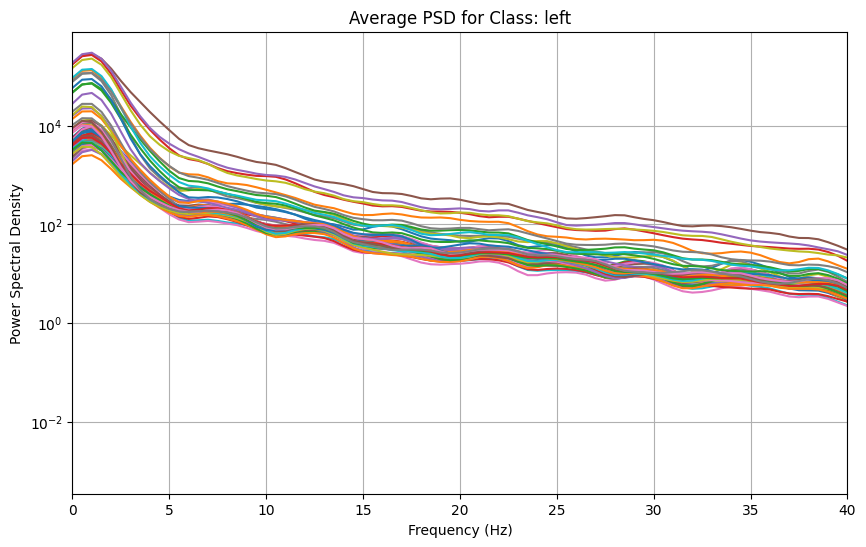

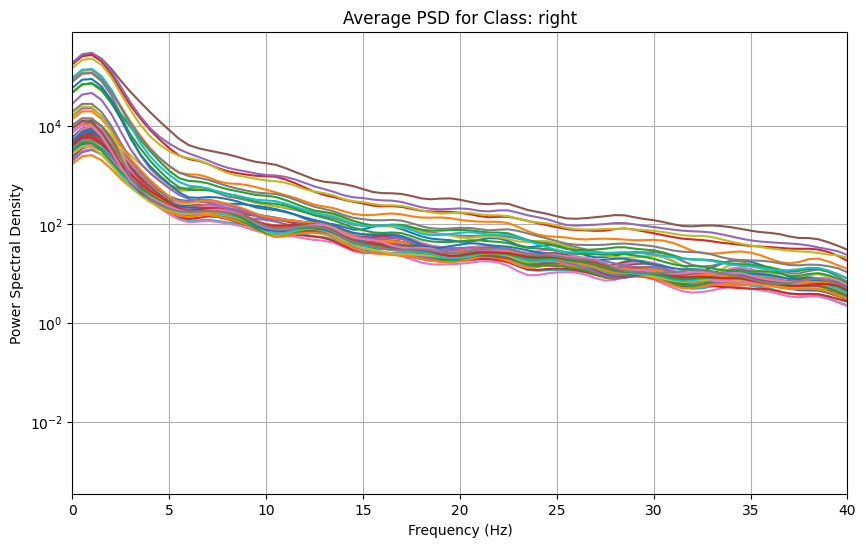

In [66]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def plot_psd(psd_values, freqs, class_label, log_scale=False, smooth=False):
    '''
    Plots the Power Spectral Density for a given class.

    Parameters:
    psd_values : 3D array (channels x freqs x trials)
        The PSD values for the class.
    freqs : 1D array
        The frequencies corresponding to the PSD values.
    class_label : str
        The label for the class being plotted.
    log_scale : bool
        Whether to use a logarithmic scale for the Y-axis.
    smooth : bool
        Whether to apply smoothing to the PSD curves.
    '''
    # Average the PSD across all trials for visualization
    avg_psd = np.mean(psd_values, axis=2)  # Average over trials

    # Optionally apply smoothing
    if smooth:
        avg_psd = gaussian_filter1d(avg_psd, sigma=1, axis=1)

    # Plot the PSD for each channel
    plt.figure(figsize=(10, 6))
    for ch in range(avg_psd.shape[0]):
        plt.plot(freqs, avg_psd[ch], label=f'Channel {ch+1}')

    plt.title(f'Average PSD for Class: {class_label}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')

    if log_scale:
        plt.yscale('log')  # Use logarithmic scale for Y-axis

    plt.xlim(0, 40)  # Focus on frequencies between 0-40 Hz
    plt.grid(True)
    plt.show()

# Plot the PSD for class 1
plot_psd(psd_r, freqs, class_label=cl1, log_scale=True, smooth=True)

# Plot the PSD for class 2
plot_psd(psd_f, freqs, class_label=cl2, log_scale=True, smooth=True)



In [81]:
# Compute the PSD for class 1 and class 2
psd_r, freqs = psd(trials[cl1], sample_rate=sample_rate)  # PSD for class 1 (e.g., left hand)
psd_f, _ = psd(trials[cl2], sample_rate=sample_rate)  # PSD for class 2 (e.g., right hand)

# You can combine these into a dictionary or similar structure for easier access:
trials_PSD = {cl1: psd_r, cl2: psd_f}  # Store both PSDs for easier reference later

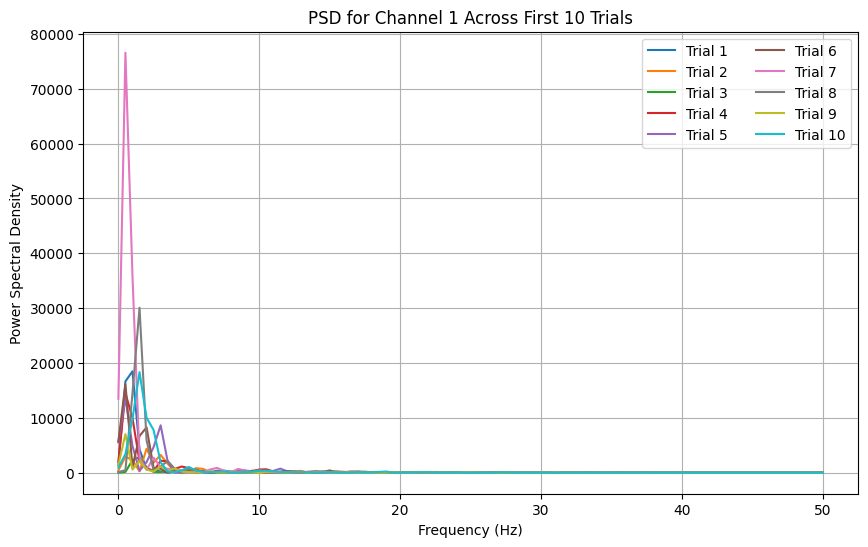

In [85]:
import matplotlib.pyplot as plt

# Limit the number of trials for visualization
n_trials_to_plot = min(10, trials_PSD[cl1].shape[2])  # Plot up to 10 trials

plt.figure(figsize=(10, 6))
for trial in range(n_trials_to_plot):
    plt.plot(freqs, trials_PSD[cl1][0, :, trial], label=f'Trial {trial+1}')  # Channel 0 as example

plt.title(f'PSD for Channel 1 Across First {n_trials_to_plot} Trials')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.show()

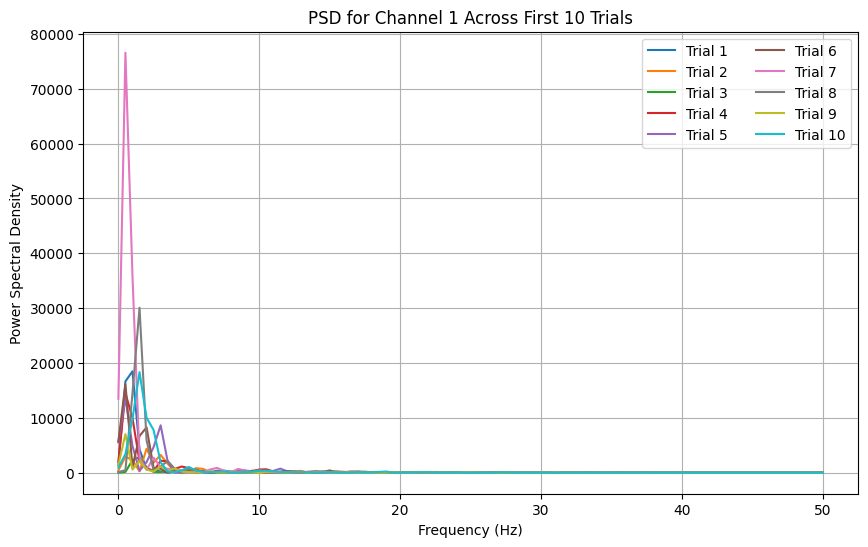

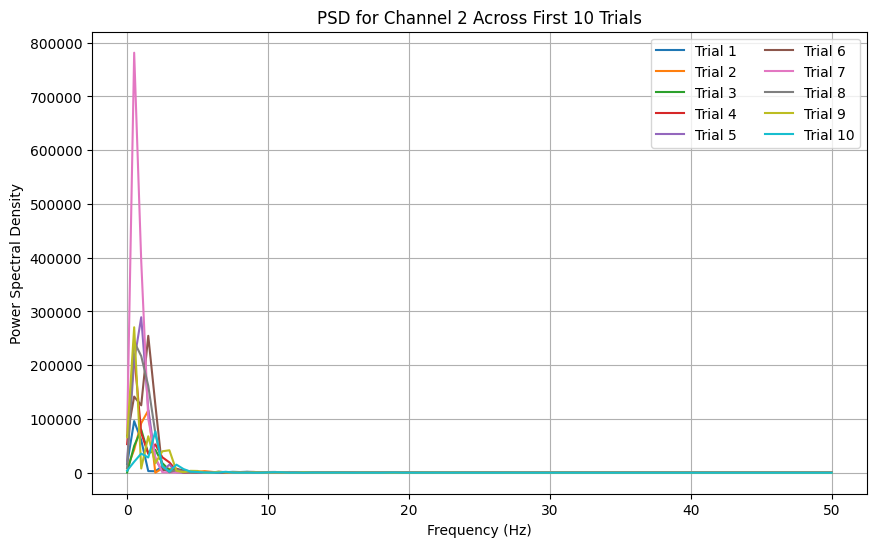

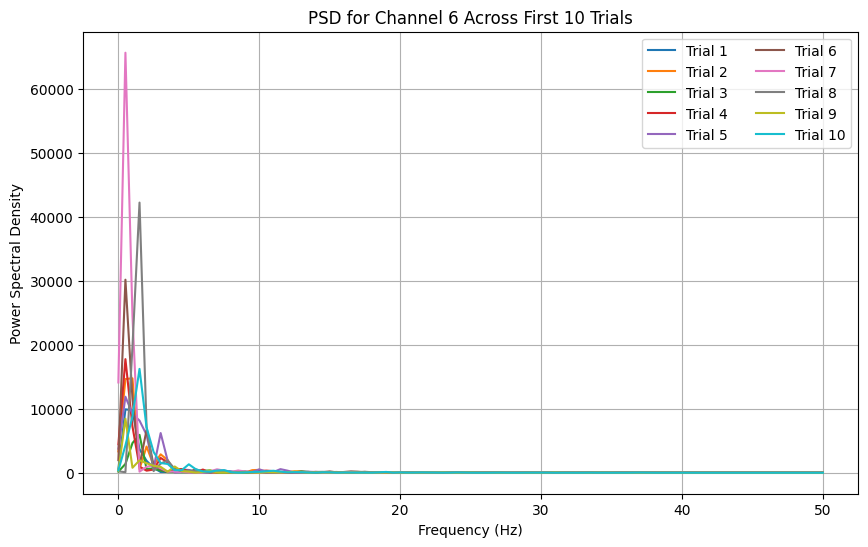

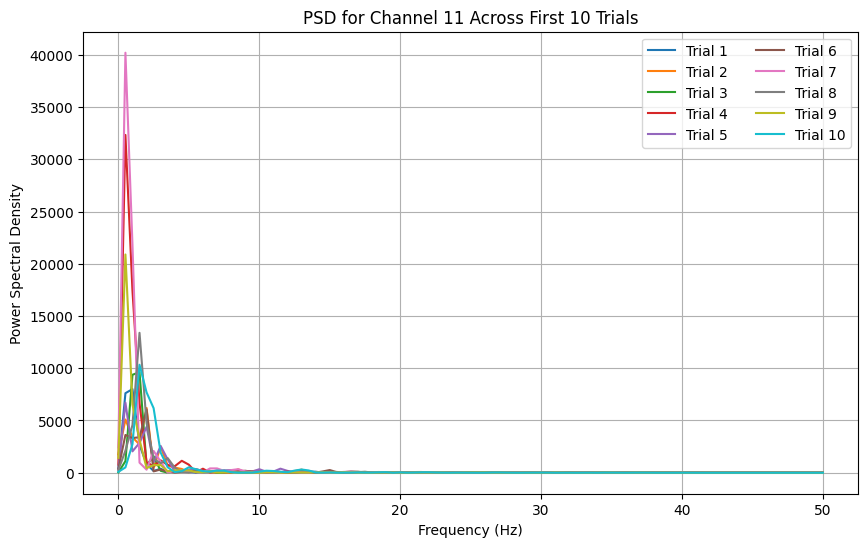

In [86]:
# Example of focusing on key channels (you can define relevant channels for motor imagery)
key_channels = [0, 1, 5, 10]  # Example: these could be motor cortex channels like C3, C4

for ch in key_channels:
    plt.figure(figsize=(10, 6))
    for trial in range(n_trials_to_plot):
        plt.plot(freqs, trials_PSD[cl1][ch, :, trial], label=f'Trial {trial+1}')
    plt.title(f'PSD for Channel {ch + 1} Across First {n_trials_to_plot} Trials')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density")
    plt.legend(loc='upper right', ncol=2)
    plt.grid(True)
    plt.show()



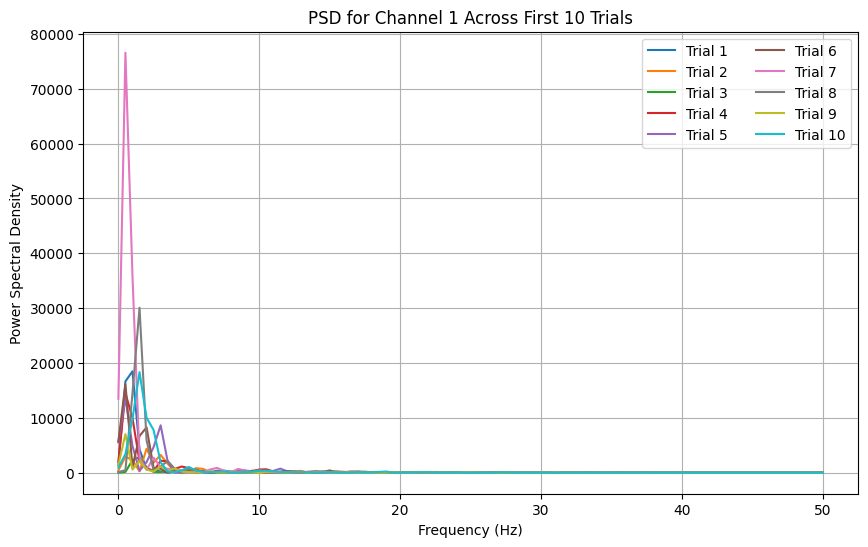

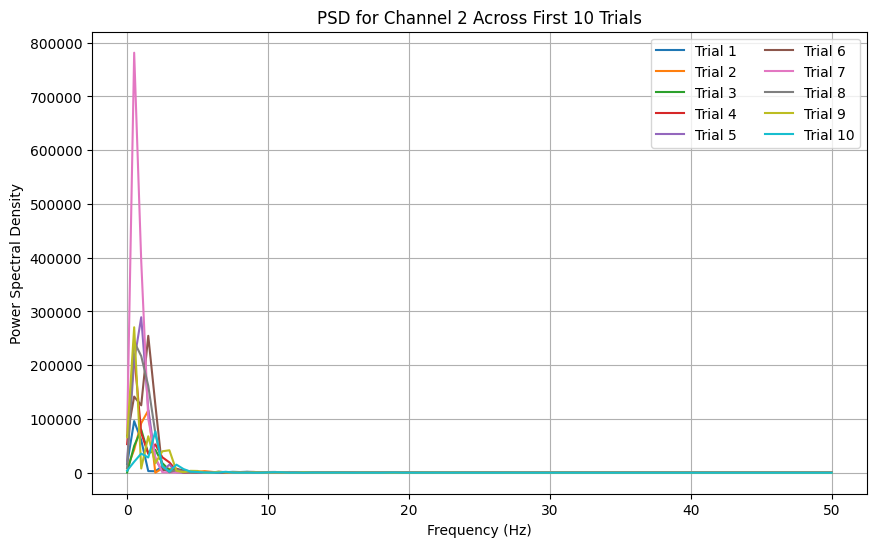

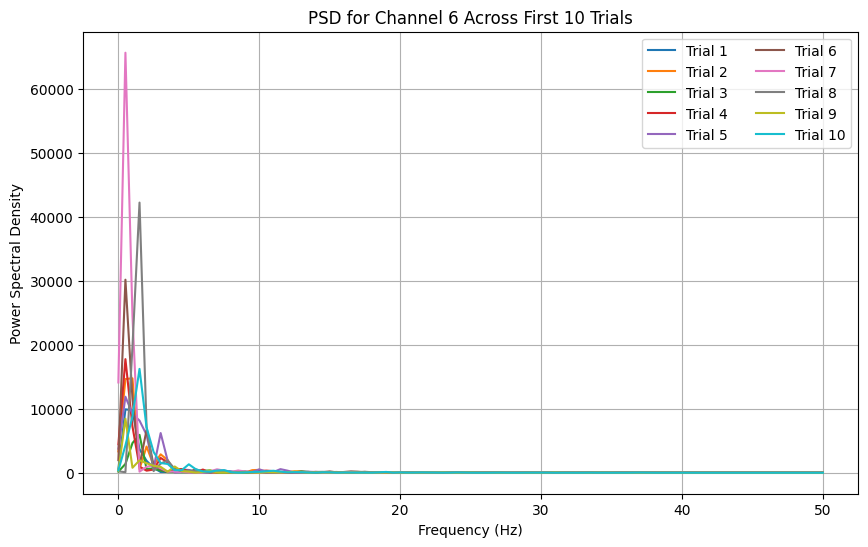

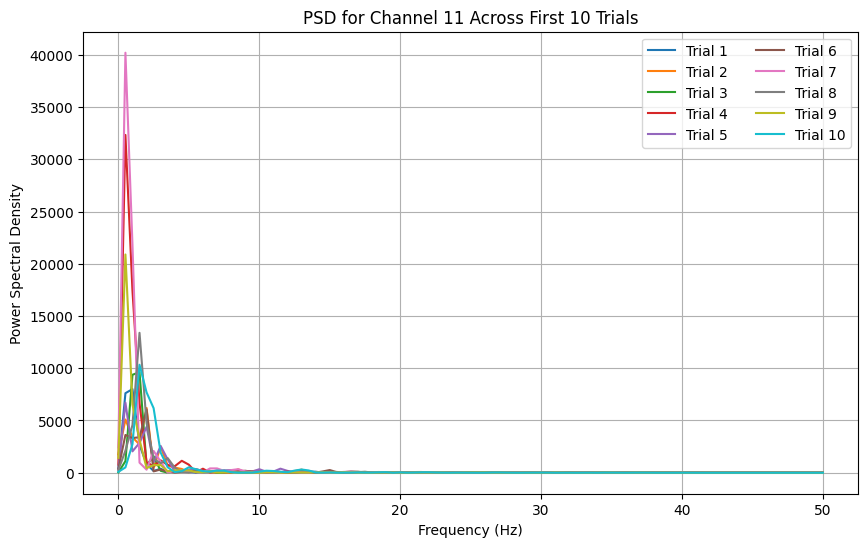

In [87]:
# Example of focusing on key channels (you can define relevant channels for motor imagery)
key_channels = [0, 1, 5, 10]  # Example: these could be motor cortex channels like C3, C4

for ch in key_channels:
    plt.figure(figsize=(10, 6))
    for trial in range(n_trials_to_plot):
        plt.plot(freqs, trials_PSD[cl1][ch, :, trial], label=f'Trial {trial+1}')
    plt.title(f'PSD for Channel {ch + 1} Across First {n_trials_to_plot} Trials')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density")
    plt.legend(loc='upper right', ncol=2)
    plt.grid(True)
    plt.show()


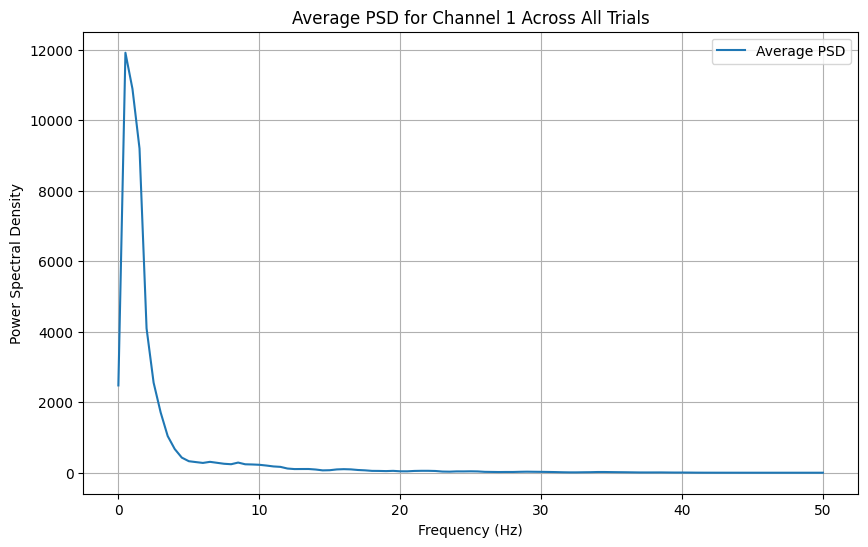

In [88]:
# Plot the average PSD across all trials for a specific channel
plt.figure(figsize=(10, 6))
avg_psd = np.mean(trials_PSD[cl1][0, :, :], axis=1)  # Averaging over all trials for channel 0
plt.plot(freqs, avg_psd, label='Average PSD')
plt.title(f'Average PSD for Channel 1 Across All Trials')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.legend()
plt.grid(True)
plt.show()


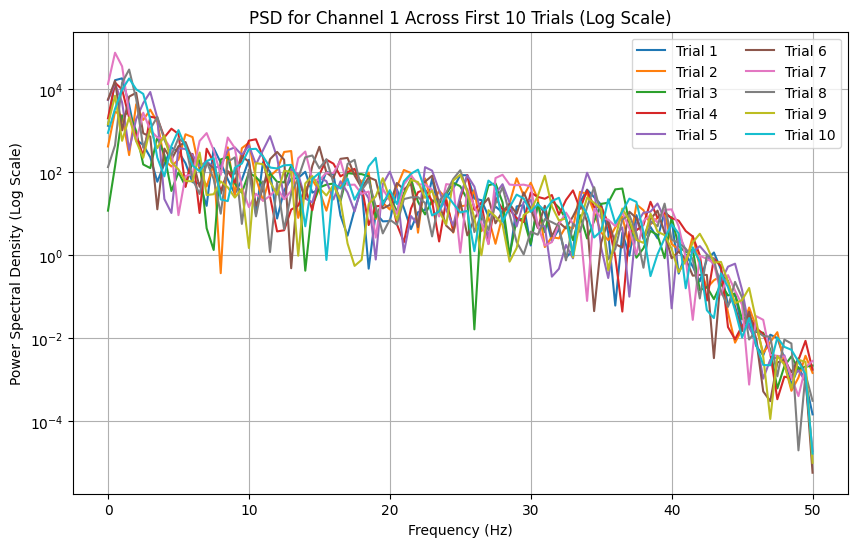

In [89]:
# Plot PSD using log scaling for the y-axis
plt.figure(figsize=(10, 6))
for trial in range(n_trials_to_plot):
    plt.plot(freqs, trials_PSD[cl1][0, :, trial], label=f'Trial {trial+1}')

plt.title(f'PSD for Channel 1 Across First {n_trials_to_plot} Trials (Log Scale)')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (Log Scale)")
plt.yscale('log')  # Apply log scaling to the y-axis
plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.show()


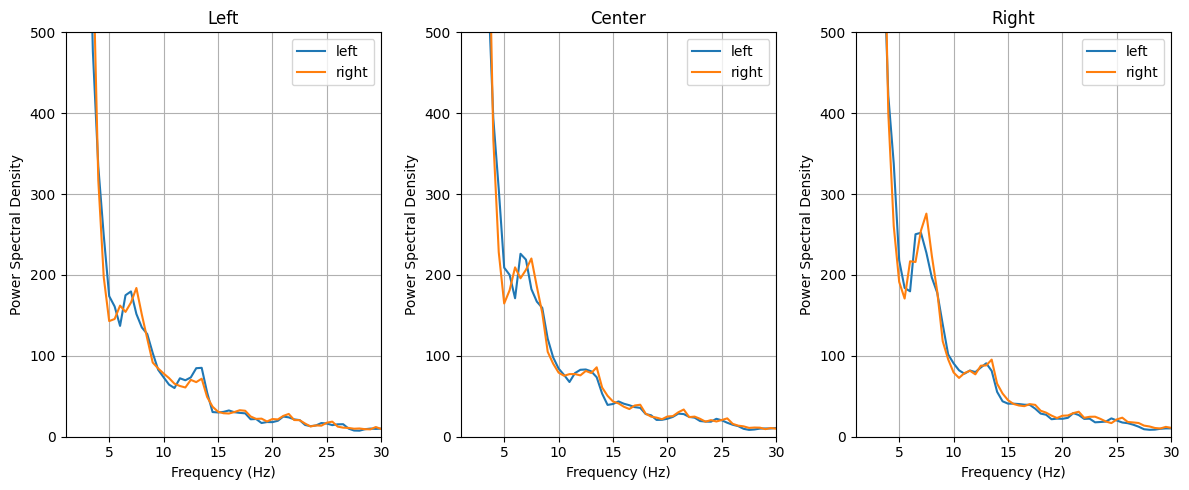

"\nimport matplotlib.pyplot as plt\n\ndef plot_psd(trials_PSD, freqs, chan_ind, chan_lab=None, maxy=None):\n    '''\n    Plots PSD data calculated with psd().\n\n    Parameters\n    ----------\n    trials : 3d-array\n        The PSD data, as returned by psd()\n    freqs : list of floats\n        The frequencies for which the PSD is defined, as returned by psd()\n    chan_ind : list of integers\n        The indices of the channels to plot\n    chan_lab : list of strings\n        (optional) List of names for each channel\n    maxy : float\n        (optional) Limit the y-axis to this value\n    '''\n    plt.figure(figsize=(12,5))\n\n    nchans = len(chan_ind)\n\n    # Maximum of 3 plots per row\n    nrows = int(np.ceil(nchans / 3))\n    ncols = min(3, nchans)\n\n    # Enumerate over the channels\n    for i,ch in enumerate(chan_ind):\n        # Figure out which subplot to draw to\n        plt.subplot(nrows,ncols,i+1)\n\n        # Plot the PSD for each class\n        for cl in trials.keys()

In [91]:
import matplotlib.pyplot as plt

def plot_psd(trials_PSD, freqs, chan_ind, chan_lab=None, maxy=None):
    '''
    Plots Power Spectral Density (PSD) data calculated for each trial.

    Parameters
    ----------
    trials_PSD : dict
        Dictionary containing PSD data for each class.
    freqs : list
        Frequencies corresponding to the PSD values.
    chan_ind : list of int
        List of indices representing the channels to plot.
    chan_lab : list of str (optional)
        Labels for the channels (if provided).
    maxy : float (optional)
        Maximum value for y-axis to ensure consistency across plots.
    '''
    plt.figure(figsize=(12, 5))

    nchans = len(chan_ind)  # Number of channels to plot
    nrows = int(np.ceil(nchans / 3))  # Rows based on number of channels, maximum 3 per row
    ncols = min(3, nchans)  # Max 3 columns

    # Enumerate through each channel
    for i, ch in enumerate(chan_ind):
        plt.subplot(nrows, ncols, i + 1)

        # Plot the mean PSD for each class (e.g., cl1 and cl2)
        for cl in trials_PSD.keys():
            # Taking the mean PSD across all trials for a particular channel
            plt.plot(freqs, np.mean(trials_PSD[cl][ch, :, :], axis=1), label=cl)

        plt.xlim(1, 30)  # Focus on the 1-30Hz range for motor imagery data

        # If maxy is provided, limit the y-axis
        if maxy is not None:
            plt.ylim(0, maxy)

        plt.grid(True)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power Spectral Density')

        # Set title based on provided labels or channel index
        if chan_lab is None:
            plt.title(f'Channel {ch + 1}')
        else:
            plt.title(chan_lab[i])

        plt.legend()

    plt.tight_layout()  # Ensure the layout looks clean
    plt.show()

# Example usage:
plot_psd(
    trials_PSD,
    freqs,
    [channel_names.index(ch) for ch in ['C3', 'Cz', 'C4']],  # Channels of interest
    chan_lab=['Left', 'Center', 'Right'],  # Labels for the channels
    maxy=500  # Limit y-axis to 500 for comparison
)











"""
import matplotlib.pyplot as plt

def plot_psd(trials_PSD, freqs, chan_ind, chan_lab=None, maxy=None):
    '''
    Plots PSD data calculated with psd().

    Parameters
    ----------
    trials : 3d-array
        The PSD data, as returned by psd()
    freqs : list of floats
        The frequencies for which the PSD is defined, as returned by psd()
    chan_ind : list of integers
        The indices of the channels to plot
    chan_lab : list of strings
        (optional) List of names for each channel
    maxy : float
        (optional) Limit the y-axis to this value
    '''
    plt.figure(figsize=(12,5))

    nchans = len(chan_ind)

    # Maximum of 3 plots per row
    nrows = int(np.ceil(nchans / 3))
    ncols = min(3, nchans)

    # Enumerate over the channels
    for i,ch in enumerate(chan_ind):
        # Figure out which subplot to draw to
        plt.subplot(nrows,ncols,i+1)

        # Plot the PSD for each class
        for cl in trials.keys():
            plt.plot(freqs, np.mean(trials_PSD[cl][ch,:,:], axis=1), label=cl)

        # All plot decoration below...

        plt.xlim(1,30)

        if maxy != None:
            plt.ylim(0,maxy)

        plt.grid()

        plt.xlabel('Frequency (Hz)')

        if chan_lab == None:
            plt.title('Channel %d' % (ch+1))
        else:
            plt.title(chan_lab[i])

        plt.legend()

    plt.tight_layout()"""

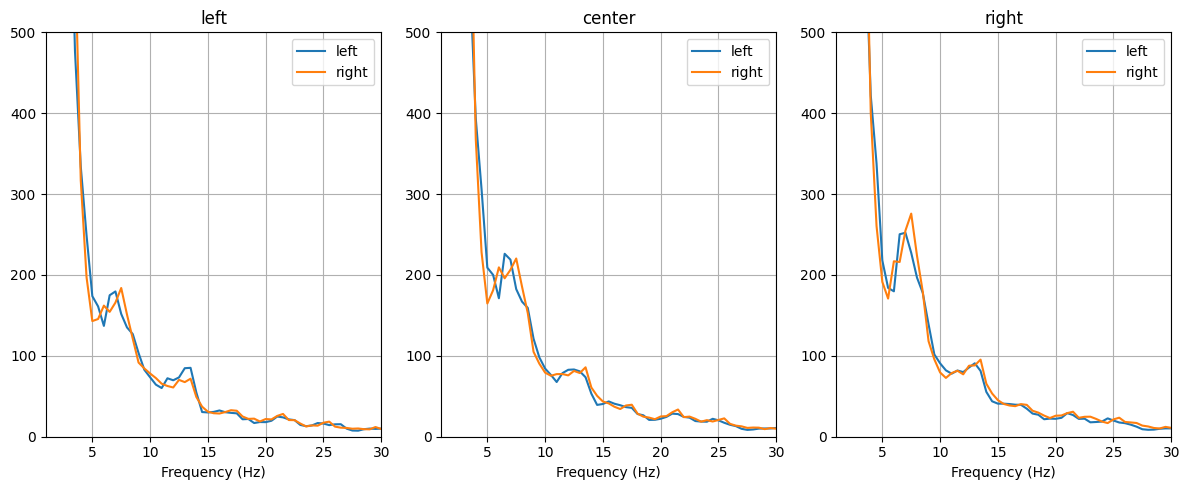

In [72]:
plot_psd(
    trials_PSD,
    freqs,
    [channel_names.index(ch) for ch in ['C3', 'Cz', 'C4']],
    chan_lab=['left', 'center', 'right'],
    maxy=500
)

In [92]:
import scipy.signal

def bandpass(trials, lo, hi, sample_rate):
    '''
    Designs and applies a bandpass filter to the signal.

    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEGsignal
    lo : float
        Lower frequency bound (in Hz)
    hi : float
        Upper frequency bound (in Hz)
    sample_rate : float
        Sample rate of the signal (in Hz)

    Returns
    -------
    trials_filt : 3d-array (channels x samples x trials)
        The bandpassed signal
    '''

    # The iirfilter() function takes the filter order: higher numbers mean a sharper frequency cutoff,
    # but the resulting signal might be shifted in time, lower numbers mean a soft frequency cutoff,
    # but the resulting signal less distorted in time. It also takes the lower and upper frequency bounds
    # to pass, divided by the niquist frequency, which is the sample rate divided by 2:
    a, b = scipy.signal.iirfilter(6, [lo/(sample_rate/2.0), hi/(sample_rate/2.0)])

    # Applying the filter to each trial
    ntrials = trials.shape[2]
    trials_filt = np.zeros((nchannels, nsamples, ntrials))
    for i in range(ntrials):
        trials_filt[:,:,i] = scipy.signal.filtfilt(a, b, trials[:,:,i], axis=1)

    return trials_filt

In [93]:
# Apply the function
trials_filt = {cl1: bandpass(trials[cl1], 8, 15, sample_rate),
               cl2: bandpass(trials[cl2], 8, 15, sample_rate)}

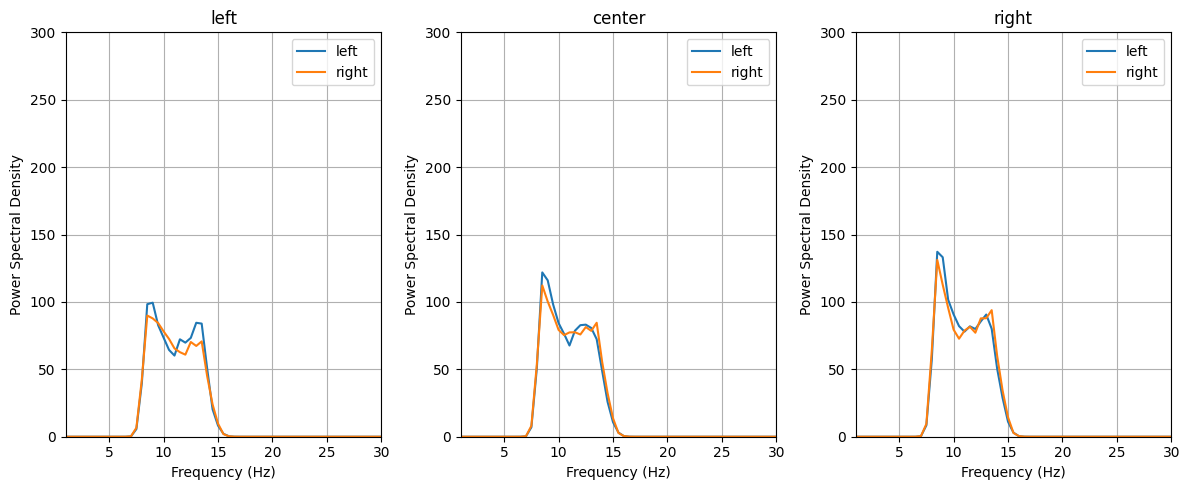

In [96]:
psd_r, freqs = psd(trials_filt[cl1],sample_rate)
psd_f, freqs = psd(trials_filt[cl2],sample_rate)
trials_PSD = {cl1: psd_r, cl2: psd_f}

plot_psd(
    trials_PSD,
    freqs,
    [channel_names.index(ch) for ch in ['C3', 'Cz', 'C4']],
    chan_lab=['left', 'center', 'right'],
    maxy=300
)

In [97]:
# Calculate the log(var) of the trials
def logvar(trials):
    '''
    Calculate the log-var of each channel.

    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEG signal.

    Returns
    -------
    logvar - 2d-array (channels x trials)
        For each channel the logvar of the signal
    '''
    return np.log(np.var(trials, axis=1))

In [98]:
# Apply the function
trials_logvar = {cl1: logvar(trials_filt[cl1]),
                 cl2: logvar(trials_filt[cl2])}

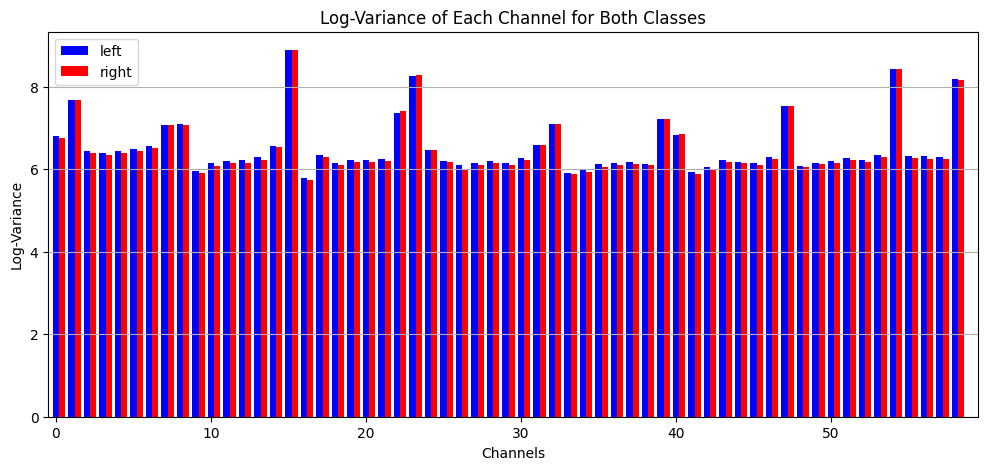

In [99]:
def plot_logvar(trials):
    '''
    Plots the log-variance of the EEG signal for each channel and compares two classes.

    Parameters
    ----------
    trials : dict
        Dictionary containing log-variance data for two classes.
    '''
    plt.figure(figsize=(12, 5))

    x0 = np.arange(nchannels)
    x1 = np.arange(nchannels) + 0.4  # Offset bars for comparison

    # Mean log-variance for each channel and class
    y0 = np.mean(trials[cl1], axis=1)
    y1 = np.mean(trials[cl2], axis=1)

    # Plot log-variance for both classes using bar graphs
    plt.bar(x0, y0, width=0.4, color='b', label=cl1)  # Class 1
    plt.bar(x1, y1, width=0.4, color='r', label=cl2)  # Class 2

    plt.xlim(-0.5, nchannels + 0.5)
    plt.xlabel('Channels')
    plt.ylabel('Log-Variance')
    plt.title('Log-Variance of Each Channel for Both Classes')

    # Add grid and legend
    plt.grid(axis='y')
    plt.legend()
    plt.show()

# Plot log-variance
plot_logvar(trials_logvar)


**Feature Extraction for Classification**

In [102]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def extract_features(trials_logvar, trials_PSD):
    '''
    Extract features by combining log-variance and PSD values.

    Parameters
    ----------
    trials_logvar : dict
        Log-variance values for each class (channels x trials).
    trials_PSD : dict
        PSD values for each class (channels x freqs x trials).

    Returns
    -------
    X : numpy array (trials x features)
        Feature matrix combining log-variance and PSD values.
    y : numpy array (trials)
        Labels corresponding to the class of each trial.
    '''
    # Create empty lists to store feature data and labels
    X = []
    y = []

    # Iterate over each class (cl1 and cl2)
    for cl, logvar_values in trials_logvar.items():
        # Get PSD values for this class
        psd_values = trials_PSD[cl]

        # Reshape logvar to match the number of trials
        logvar_reshaped = logvar_values.T  # (trials x channels)

        # Reshape PSD to be (trials x channels x freqs)
        psd_reshaped = psd_values.transpose(2, 0, 1)  # (trials x channels x freqs)

        # Combine logvar and PSD features (flatten PSD to 2D: trials x (channels * freqs))
        combined_features = np.concatenate([logvar_reshaped, psd_reshaped.reshape(psd_reshaped.shape[0], -1)], axis=1)

        # Add to X (features) and y (labels)
        X.append(combined_features)
        y.extend([cl] * combined_features.shape[0])  # Add labels for each trial

    # Convert lists to numpy arrays
    X = np.vstack(X)  # Combine all feature matrices from both classes
    y = np.array(y)   # Convert label list to a numpy array

    return X, y

# Example of how to call the function (assuming trials_logvar and trials_PSD are defined)
X, y = extract_features(trials_logvar, trials_PSD)

# Standardize the feature matrix (mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"X_scaled shape: {X_scaled.shape}")
print(f"y shape: {y.shape}")


X_scaled shape: (200, 6018)
y shape: (200,)


In [103]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (160, 6018)
Testing set size: (40, 6018)


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the classifier
clf = LogisticRegression(max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Get a more detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.4250
Classification Report:
              precision    recall  f1-score   support

        left       0.44      0.33      0.38        21
       right       0.42      0.53      0.47        19

    accuracy                           0.42        40
   macro avg       0.43      0.43      0.42        40
weighted avg       0.43      0.42      0.42        40



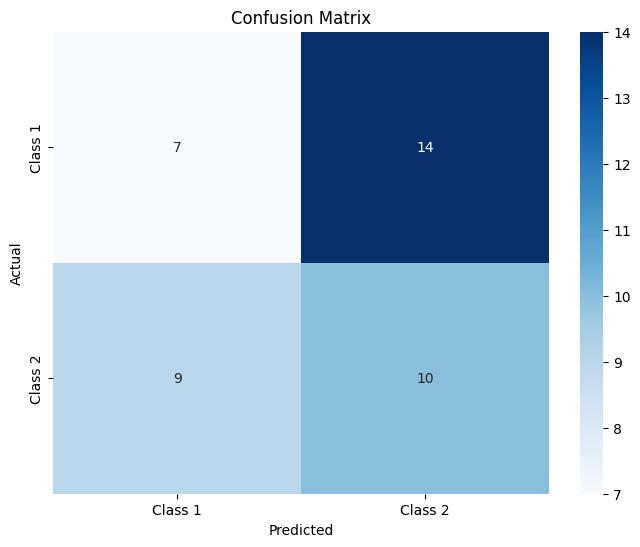

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [106]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{'left': 79, 'right': 81}


In [107]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(f"Balanced training set size: {X_train_sm.shape}")


Balanced training set size: (162, 6018)


In [108]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")

# Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest Test Accuracy: 0.5250
Classification Report for Random Forest:
              precision    recall  f1-score   support

        left       0.55      0.57      0.56        21
       right       0.50      0.47      0.49        19

    accuracy                           0.53        40
   macro avg       0.52      0.52      0.52        40
weighted avg       0.52      0.53      0.52        40



In [109]:
from sklearn.decomposition import PCA

# Initialize PCA to reduce dimensionality while preserving 95% of variance
pca = PCA(n_components=0.95)

# Apply PCA on training and test set
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Reduced feature set shape: {X_train_pca.shape}")

# Train and evaluate the model on the reduced feature set
clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Test Accuracy after PCA: {accuracy_pca:.4f}")


Reduced feature set shape: (160, 79)
Test Accuracy after PCA: 0.4250


In [110]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training set
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Grid Search Accuracy: {grid_search.best_score_:.4f}")


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Grid Search Accuracy: 0.5375
